In [3]:
# Importing libraries
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
## test

# scikit learn packages 
from sklearn.feature_extraction.text import TfidfVectorizer # vectorizer
from sklearn.model_selection import train_test_split # For splitting into test and train data
from sklearn.linear_model import SGDClassifier # SGD classifier - better model for classification
from sklearn.pipeline import Pipeline # Pipeline framework
from sklearn.metrics import make_scorer, cohen_kappa_score
from sklearn.model_selection import GridSearchCV, cross_validate # Library that allows optimization of hyperparameters

In [4]:
# Path to the data
#data_ghelms = "/Users/gustavhelms/Documents/Cognitive Science/5_semester/Bachelor/political_polarization/Folketinget-Scraping/data/folketinget_2019_2021_raw.csv"
data_mrg = "./data/folketinget_2019_2021_raw.csv"
# Importing data - only a subset 
#df = pd.read_csv(data_ghelms)
df = pd.read_csv(data_mrg)

In [5]:
df['Parti'].value_counts()

Socialdemokratiet              11194
Venstre                         9737
Dansk Folkeparti                8793
Socialistisk Folkeparti         5496
Enhedslisten                    5181
Radikale Venstre                4044
Nye Borgerlige                  3503
Det Konservative Folkeparti     2361
Alternativet                    2190
Liberal Alliance                2150
Socialdemokraterne               366
Name: Parti, dtype: int64

# Implementing Pipeline

In [6]:
df2019 = df[df['Year'] == 2019][:500]
df2020 = df[df['Year'] == 2020][:500]
df2021 = df[df['Year'] == 2021][:500]
df1500 = pd.concat([df2019, df2020, df2021])

In [7]:
# Splitting data
X, y = df1500['text'], df1500['Parti']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42, stratify = df1500["Parti"])

In [8]:
pipe = Pipeline([
('vect', TfidfVectorizer(ngram_range=(1,2))),
('SGD', SGDClassifier(loss='log', 
                      penalty='l2', 
                      shuffle=True,
                      alpha=1e-2,
                      class_weight = 'balanced'))])

grid = GridSearchCV(estimator = pipe,
                        param_grid = {'SGD__alpha': (1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8)},
                        cv=20, # number of cross validations
                        scoring={'kappa_score': make_scorer(cohen_kappa_score)},
                        refit='kappa_score',
                        n_jobs=2)

In [9]:
# fitting hyper parameters
grid.fit(X_train, y_train)

GridSearchCV(cv=20,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(ngram_range=(1, 2))),
                                       ('SGD',
                                        SGDClassifier(alpha=0.01,
                                                      class_weight='balanced',
                                                      loss='log'))]),
             n_jobs=2,
             param_grid={'SGD__alpha': (0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                        1e-07, 1e-08)},
             refit='kappa_score',
             scoring={'kappa_score': make_scorer(cohen_kappa_score)})

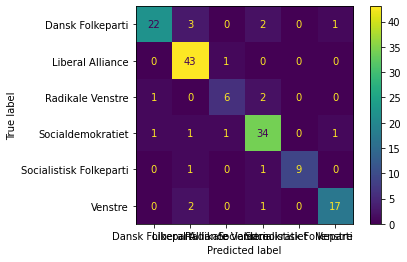

In [10]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
plot_confusion_matrix(grid, X_test, y_test)
plt.show()

In [13]:
# inspect results
results = pd.DataFrame(grid.cv_results_)

In [17]:
results['mean_test_kappa_score']

0    0.268127
1    0.714437
2    0.796004
3    0.811624
4    0.830780
5    0.813398
6    0.806569
Name: mean_test_kappa_score, dtype: float64

In [16]:
cols

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_SGD__alpha', 'params', 'split0_test_kappa_score',
       'split1_test_kappa_score', 'split2_test_kappa_score',
       'split3_test_kappa_score', 'split4_test_kappa_score',
       'split5_test_kappa_score', 'split6_test_kappa_score',
       'split7_test_kappa_score', 'split8_test_kappa_score',
       'split9_test_kappa_score', 'split10_test_kappa_score',
       'split11_test_kappa_score', 'split12_test_kappa_score',
       'split13_test_kappa_score', 'split14_test_kappa_score',
       'split15_test_kappa_score', 'split16_test_kappa_score',
       'split17_test_kappa_score', 'split18_test_kappa_score',
       'split19_test_kappa_score', 'mean_test_kappa_score',
       'std_test_kappa_score', 'rank_test_kappa_score'],
      dtype='object')

In [ ]:
set(df['Parti'])

{'Alternativet',
 'Dansk Folkeparti',
 'Det Konservative Folkeparti',
 'Enhedslisten',
 'Liberal Alliance',
 'Nye Borgerlige',
 'Radikale Venstre',
 'Socialdemokraterne',
 'Socialdemokratiet',
 'Socialistisk Folkeparti',
 'Venstre'}

In [ ]:
# loop through years and fit/predict per year, append scores and so on

best_scores = []
best_params = []
precision_scores = []
accuracy_scores = []

for year in df.Year.unique():
    subset = df[df['Year'] == year][:1000]
    X, y = subset["text"], subset["Parti"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42, stratify = subset["Parti"])
    grid_SGD.fit(X_train, y_train)
    df_train = pd.DataFrame(grid_SGD.cv_results_)
    plt.legend()
    
    # save best kappa score and params generating that score
    best_scores.append(grid_SGD.best_score_)
    best_params.append(grid_SGD.best_params_)
    
    # metrics on test set
    y_pred = grid_SGD.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='weighted'))